In [111]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [112]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [113]:
import datetime
from datetime import date
import sys
import numpy as np
import netCDF4 as nc
import cmocean as cm
import matplotlib.pyplot as plt
from matplotlib import reload
#from oct2py import octave
import seawater as sw
from __future__ import print_function
# from numpy import *
# from scipy import *
import pandas as pd


plt.style.use('seaborn')

""
# from salishsea_tools import (
#     nc_tools,
#     viz_tools,
#     geo_tools,
#     tidetools
# )

%matplotlib inline

## Available river data

    1 AlouetteDissNaMgCa.csv
    2 CheakamusDaisyDissNaMgCa.csv
    3 Cowichan1kSomenosDissNaMgCa.csv
    4 EnglishmanHwy19DissNaMgCa.csv
    5 FraserAtHopeDissNaMgCa.csv
    6 FraserGravesendDissNaMgCa.csv
    7 QuinsamMouthDissNaMgCa.csv
    8 SumasIBDissNaMgCa.csv
    9 TsolumBelowMurexDissNaMgCa.csv

In [114]:
t1=pd.read_csv('/data/tjarniko/ECRivers/FraserAtHopeDissNaMgCa.csv')
Cas=[i for i in t1.keys() if i.startswith('Calcium')]
Fraser=pd.DataFrame()
Fraser['time']=t1['Sample time']
Fraser['time'] = pd.to_datetime(Fraser['time'])
Fraser['Ca_mgL']=[row[Cas[0]] if ~np.isnan(row[Cas[0]]) else 
              row[Cas[1]] if ~np.isnan(row[Cas[1]]) else
              row[Cas[2]] if ~np.isnan(row[Cas[2]]) else
              row[Cas[3]] if ~np.isnan(row[Cas[3]]) else
              row[Cas[4]] for r,row in t1.iterrows()]
Fraser['Fraser_Ca_mM']=Fraser['Ca_mgL']/40.078

t1=pd.read_csv('/ocean/eolson/MEOPAR/obs/ECRivers/Cowichan1kSomenosDissNaMgCa.csv')
Cas=[i for i in t1.keys() if i.startswith('Calcium')]
Cowichan=pd.DataFrame()
Cowichan['time']=t1['Sample time']
Cowichan['time'] = pd.to_datetime(Cowichan['time'])
Cowichan['Ca_mgL']=[row[Cas[0]] if ~np.isnan(row[Cas[0]]) else 
              row[Cas[1]] if ~np.isnan(row[Cas[1]]) else
              row[Cas[2]] for r,row in t1.iterrows()]
Cowichan['Cowichan_Ca_mM']=Cowichan['Ca_mgL']/40.078

t1=pd.read_csv('/ocean/eolson/MEOPAR/obs/ECRivers/EnglishmanHwy19DissNaMgCa.csv')
Cas=[i for i in t1.keys() if i.startswith('Calcium')]
Englishman=pd.DataFrame()
Englishman['time']=t1['Sample time']
Englishman['time'] = pd.to_datetime(Englishman['time'])
Englishman['Ca_mgL']=[row[Cas[0]] if ~np.isnan(row[Cas[0]]) else 
              row[Cas[1]] if ~np.isnan(row[Cas[1]]) else
              row[Cas[2]] if ~np.isnan(row[Cas[2]]) else
              row[Cas[3]] for r,row in t1.iterrows()]
Englishman['Englishman_Ca_mM']=Englishman['Ca_mgL']/40.078

t1=pd.read_csv('/ocean/eolson/MEOPAR/obs/ECRivers/TsolumBelowMurexDissNaMgCa.csv')
Cas=[i for i in t1.keys() if i.startswith('Calcium')]
Tsolum=pd.DataFrame()
Tsolum['time']=t1['Sample time']
Tsolum['time'] = pd.to_datetime(Tsolum['time'])
Tsolum['Ca_mgL']=[row[Cas[0]] if ~np.isnan(row[Cas[0]]) else 
              row[Cas[1]] if ~np.isnan(row[Cas[1]]) else
              row[Cas[2]] for r,row in t1.iterrows()]
Tsolum['Tsolum_Ca_mM']=Tsolum['Ca_mgL']/40.078

t1=pd.read_csv('/ocean/eolson/MEOPAR/obs/ECRivers/QuinsamMouthDissNaMgCa.csv')
Cas=[i for i in t1.keys() if i.startswith('Calcium')]
Quinsam=pd.DataFrame()
Quinsam['time']=t1['Sample time']
Quinsam['time'] = pd.to_datetime(Quinsam['time'])
Quinsam['Ca_mgL']=[row[Cas[0]] if ~np.isnan(row[Cas[0]]) else 
              row[Cas[1]] if ~np.isnan(row[Cas[1]]) else
              row[Cas[2]] if ~np.isnan(row[Cas[2]]) else
              row[Cas[3]] if ~np.isnan(row[Cas[3]]) else
              row[Cas[4]] for r,row in t1.iterrows()]
Quinsam['Quinsam_Ca_mM']=Quinsam['Ca_mgL']/40.078

t1=pd.read_csv('/ocean/eolson/MEOPAR/obs/ECRivers/CheakamusDaisyDissNaMgCa.csv')
Cas=[i for i in t1.keys() if i.startswith('Calcium')]
Cheakamus=pd.DataFrame()
Cheakamus['time']=t1['Sample time']
Cheakamus['time'] = pd.to_datetime(Cheakamus['time'])
Cheakamus['Ca_mgL']=[row[Cas[0]] if ~np.isnan(row[Cas[0]]) else 
              row[Cas[1]] if ~np.isnan(row[Cas[1]]) else
              row[Cas[2]] if ~np.isnan(row[Cas[2]]) else
              row[Cas[3]] for r,row in t1.iterrows()]
Cheakamus['Cheakamus_Ca_mM']=Cheakamus['Ca_mgL']/40.078

t1=pd.read_csv('/ocean/eolson/MEOPAR/obs/ECRivers/SumasIBDissNaMgCa.csv')
Cas=[i for i in t1.keys() if i.startswith('Calcium')]
Sumas=pd.DataFrame()
Sumas['time']=t1['Sample time']
Sumas['time'] = pd.to_datetime(Sumas['time'])
Sumas['Ca_mgL']=[row[Cas[0]] if ~np.isnan(row[Cas[0]]) else 
              row[Cas[1]] if ~np.isnan(row[Cas[1]]) else
              row[Cas[2]] if ~np.isnan(row[Cas[2]]) else
              row[Cas[3]] for r,row in t1.iterrows()]
Sumas['Sumas_Ca_mM']=Sumas['Ca_mgL']/40.078

t1=pd.read_csv('/ocean/eolson/MEOPAR/obs/ECRivers/FraserGravesendDissNaMgCa.csv')
Cas=[i for i in t1.keys() if i.startswith('Calcium')]
FraserGraves=pd.DataFrame()
FraserGraves['time']=t1['Sample time']
FraserGraves['time'] = pd.to_datetime(FraserGraves['time'])
FraserGraves['Ca_mgL']=[row[Cas[0]] if ~np.isnan(row[Cas[0]]) else 
              row[Cas[1]] for r,row in t1.iterrows()]
FraserGraves['FraserGraves_Ca_mM']=FraserGraves['Ca_mgL']/40.078

t1=pd.read_csv('/ocean/eolson/MEOPAR/obs/ECRivers/AlouetteDissNaMgCa.csv')
Cas=[i for i in t1.keys() if i.startswith('Calcium')]
Alouette=pd.DataFrame()
Alouette['time']=t1['Sample time']
Alouette['time'] = pd.to_datetime(Alouette['time'])
Alouette['Ca_mgL']=[row[Cas[0]] if ~np.isnan(row[Cas[0]]) else 
              row[Cas[1]] if ~np.isnan(row[Cas[1]]) else 
              row[Cas[2]] if ~np.isnan(row[Cas[2]]) else 
              row[Cas[3]] for r,row in t1.iterrows()]
Alouette['Alouette_Ca_mM']=Alouette['Ca_mgL']/40.078

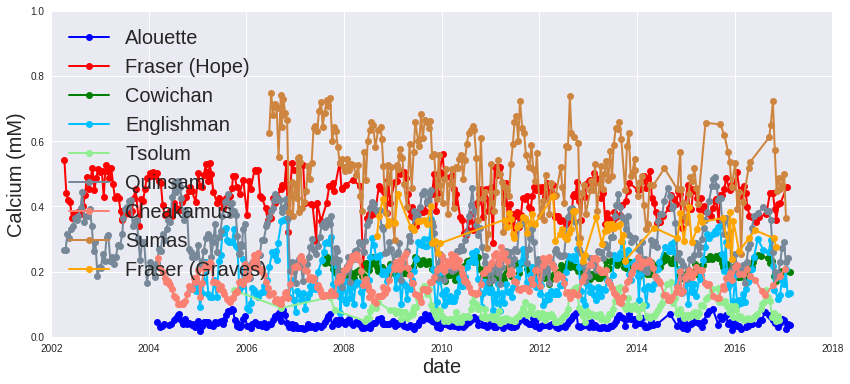

In [128]:
f, ax1 = plt.subplots(1,1, figsize = (14, 6), sharey = True)

ax1.plot('time', 'Alouette_Ca_mM', data=Alouette, marker='o', \
         markerfacecolor='blue', color = 'blue', linewidth=2 )
ax1.plot('time', 'Fraser_Ca_mM', data=Fraser, marker='o', \
         markerfacecolor='red', color = 'red', linewidth=2 )
ax1.plot('time', 'Cowichan_Ca_mM', data=Cowichan, marker='o',\
         markerfacecolor='green', color = 'green', linewidth=2 )
ax1.plot('time', 'Englishman_Ca_mM', data=Englishman, marker='o', \
        markerfacecolor='deepskyblue', color = 'deepskyblue', linewidth=2 )
ax1.plot('time', 'Tsolum_Ca_mM', data=Tsolum, marker='o', \
        markerfacecolor='lightgreen', color = 'lightgreen', linewidth=2 )
ax1.plot('time', 'Quinsam_Ca_mM', data=Quinsam, marker='o', \
        markerfacecolor='lightslategray', color = 'lightslategrey', linewidth=2 )
ax1.plot('time', 'Cheakamus_Ca_mM', data=Cheakamus, marker='o',\
        markerfacecolor='salmon', color = 'salmon', linewidth=2 )
ax1.plot('time', 'Sumas_Ca_mM', data=Sumas, marker='o',\
        markerfacecolor='peru', color = 'peru', linewidth=2 )
ax1.plot('time', 'FraserGraves_Ca_mM', data=FraserGraves, marker='o',\
        markerfacecolor='orange', color = 'orange', linewidth=2 )
plt.legend(['Alouette','Fraser (Hope)','Cowichan','Englishman',\
            'Tsolum','Quinsam','Cheakamus','Sumas','Fraser (Graves)'],fontsize = 20)
plt.xlim([730851,736695])
plt.ylim([0,1])
plt.xlabel('date',fontsize = 20)
plt.ylabel('Calcium (mM)',fontsize = 20)

730851


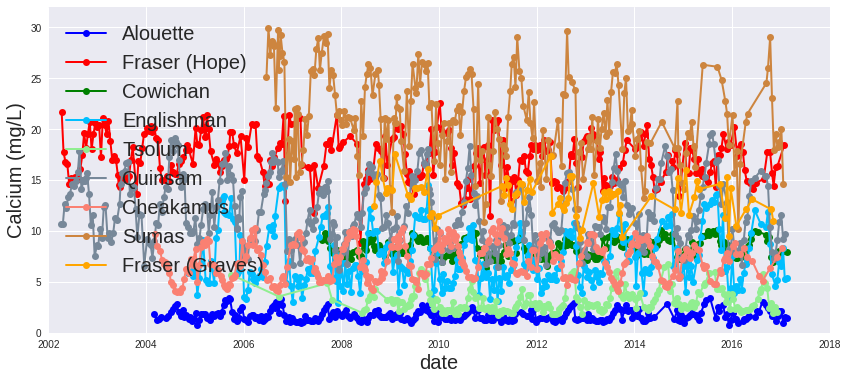

In [124]:
f, ax1 = plt.subplots(1,1, figsize = (14, 6), sharey = True)

ax1.plot('time', 'Ca_mgL', data=Alouette, marker='o', \
         markerfacecolor='blue', color = 'blue', linewidth=2 )
ax1.plot('time', 'Ca_mgL', data=Fraser, marker='o', \
         markerfacecolor='red', color = 'red', linewidth=2 )
ax1.plot('time', 'Ca_mgL', data=Cowichan, marker='o',\
         markerfacecolor='green', color = 'green', linewidth=2 )
ax1.plot('time', 'Ca_mgL', data=Englishman, marker='o', \
        markerfacecolor='deepskyblue', color = 'deepskyblue', linewidth=2 )
ax1.plot('time', 'Ca_mgL', data=Tsolum, marker='o', \
        markerfacecolor='lightgreen', color = 'lightgreen', linewidth=2 )
ax1.plot('time', 'Ca_mgL', data=Quinsam, marker='o', \
        markerfacecolor='lightslategray', color = 'lightslategrey', linewidth=2 )
ax1.plot('time', 'Ca_mgL', data=Cheakamus, marker='o',\
        markerfacecolor='salmon', color = 'salmon', linewidth=2 )
ax1.plot('time', 'Ca_mgL', data=Sumas, marker='o',\
        markerfacecolor='peru', color = 'peru', linewidth=2 )
ax1.plot('time', 'Ca_mgL', data=FraserGraves, marker='o',\
        markerfacecolor='orange', color = 'orange', linewidth=2 )
plt.legend(['Alouette','Fraser (Hope)','Cowichan','Englishman',\
            'Tsolum','Quinsam','Cheakamus','Sumas','Fraser (Graves)'], fontsize = 20)
plt.xlim([730851,736695])
plt.ylim([0,32])
plt.xlabel('date',fontsize = 20)
plt.ylabel('Calcium (mg/L)',fontsize = 20)

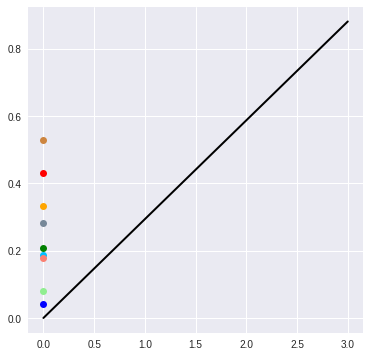

In [154]:
S = np.arange(0,35,0.5)
#print('Salinity: ', S)
C = 0.02128 / 40.087 * (S / 1.80655)
# print('calcium in moles:', C)
# print('(calcium in umols)', C*1e6)
# print('(calcium in mmols)', C*1e3)

# 350 µmol kg−

f, (ax2) = plt.subplots(1,1, figsize = (6, 6), sharey = False)


ax2.plot(S[0:7],C[0:7]*1e3, marker= None, \
         markerfacecolor='black', color = 'black', linewidth=2)


ax2.plot(0,np.mean(Alouette['Alouette_Ca_mM']),marker= 'o', \
         markerfacecolor='blue', color = 'blue', linewidth=2)
ax2.plot(0,np.mean(Fraser['Fraser_Ca_mM']),  marker='o', \
          markerfacecolor='red', color = 'red', linewidth=2 )
ax2.plot(0,np.mean(Cowichan['Cowichan_Ca_mM']),  marker='o', \
          markerfacecolor='green', color = 'green', linewidth=2 )
ax2.plot(0,np.mean(Englishman['Englishman_Ca_mM']),  marker='o', \
         markerfacecolor='deepskyblue', color = 'deepskyblue', linewidth=2 )
ax2.plot(0,np.mean(Tsolum['Tsolum_Ca_mM']),  marker='o', \
         markerfacecolor='lightgreen', color = 'lightgreen', linewidth=2 )
ax2.plot(0,np.mean(Quinsam['Quinsam_Ca_mM']),  marker='o', \
         markerfacecolor='lightslategray', color = 'lightslategrey', linewidth=2 )
ax2.plot(0,np.mean(Cheakamus['Cheakamus_Ca_mM']),  marker='o', \
         markerfacecolor='salmon', color = 'salmon', linewidth=2 )
ax2.plot(0,np.mean(Sumas['Sumas_Ca_mM']),  marker='o', \
         markerfacecolor='peru', color = 'peru', linewidth=2 )
ax2.plot(0,np.mean(FraserGraves['FraserGraves_Ca_mM']),  marker='o', \
         markerfacecolor='orange', color = 'orange', linewidth=2 )

In [ ]:
print(date.toordinal(date(2002,1,1)))